In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import MultiComparison

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

# Loading Data: Recall Scores

In [2]:
recall = pd.read_csv("recall_completo.csv")
recall.drop(['Unnamed: 0'], axis=1, inplace = True)
recall.head()

,ID,Decision Tree v2,Random Forest v2,KNN v2,Decision Tree v5,Random Forest v5,KNN v5,Decision Tree v6,Random Forest v6,KNN v6,Decision Tree v7,Random Forest v7,KNN v7,Decision Tree v8,Random Forest v8,KNN v8,Decision Tree v9,Random Forest v9,KNN v9,Decision Tree v10,Random Forest v10,KNN v10
0,0,0.362530,0.358421,0.098047,0.781276,0.821934,0.936688,0.557556,0.619859,0.658274,0.792752,0.805204,0.705324,0.548341,0.571702,0.561608,0.786443,0.814254,0.750594,0.569966,0.617772,0.437119
1,1,0.358976,0.358555,0.094975,0.779537,0.822161,0.936376,0.576201,0.620180,0.657012,0.796367,0.805753,0.705538,0.552387,0.571267,0.563148,0.788693,0.814599,0.754446,0.565585,0.624944,0.456282
2,2,0.356178,0.360169,0.100391,0.777040,0.821969,0.936763,0.562627,0.622580,0.651120,0.791882,0.806258,0.706203,0.542861,0.569932,0.562108,0.789175,0.814113,0.751087,0.562892,0.622053,0.476299
3,3,0.353263,0.356669,0.097181,0.773940,0.822852,0.935305,0.561703,0.622183,0.659187,0.791556,0.805910,0.708444,0.557732,0.570602,0.563255,0.787879,0.813517,0.750281,0.563982,0.616833,0.438128
4,4,0.354366,0.359043,0.100766,0.775048,0.823575,0.937823,0.567489,0.622080,0.660367,0.795273,0.806152,0.707928,0.547816,0.569684,0.564414,0.789517,0.813222,0.748484,0.568343,0.621394,0.474525


In [3]:
recall.shape

(30, 22)

In [4]:
recall.columns

Index(['ID', 'Decision Tree v2', 'Random Forest v2', 'KNN v2',
       'Decision Tree v5', 'Random Forest v5', 'KNN v5', 'Decision Tree v6',
       'Random Forest v6', 'KNN v6', 'Decision Tree v7', 'Random Forest v7',
       'KNN v7', 'Decision Tree v8', 'Random Forest v8', 'KNN v8',
       'Decision Tree v9', 'Random Forest v9', 'KNN v9', 'Decision Tree v10',
       'Random Forest v10', 'KNN v10'],
      dtype='object')

In [5]:
recall.describe()

,ID,Decision Tree v2,Random Forest v2,KNN v2,Decision Tree v5,Random Forest v5,KNN v5,Decision Tree v6,Random Forest v6,KNN v6,Decision Tree v7,Random Forest v7,KNN v7,Decision Tree v8,Random Forest v8,KNN v8,Decision Tree v9,Random Forest v9,KNN v9,Decision Tree v10,Random Forest v10,KNN v10
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,14.500000,0.358220,0.359337,0.097050,0.777691,0.822276,0.936221,0.561127,0.621627,0.658990,0.793790,0.805862,0.706129,0.550735,0.570543,0.562789,0.788392,0.813568,0.752800,0.565944,0.620558,0.463968
std,8.803408,0.002898,0.002436,0.002206,0.002891,0.000996,0.001174,0.011515,0.001859,0.003012,0.001691,0.000589,0.001226,0.005194,0.001110,0.003360,0.000852,0.000704,0.003000,0.003822,0.002762,0.025330
min,0.000000,0.353263,0.352935,0.093191,0.770233,0.820440,0.932806,0.539617,0.617696,0.651120,0.790435,0.804778,0.704241,0.540910,0.569003,0.554392,0.786443,0.811589,0.748484,0.558647,0.613980,0.418077
25%,7.250000,0.356349,0.357341,0.095032,0.776245,0.821818,0.935373,0.555717,0.620242,0.657488,0.792368,0.805503,0.705138,0.547129,0.569842,0.560850,0.787905,0.813226,0.750474,0.564047,0.619087,0.439497
50%,14.500000,0.357841,0.360046,0.097128,0.777370,0.822288,0.936380,0.562165,0.621773,0.659248,0.793898,0.805695,0.705975,0.550765,0.570310,0.562966,0.788396,0.813446,0.752123,0.565439,0.620755,0.458012
75%,21.750000,0.360078,0.360927,0.098496,0.779513,0.822838,0.936981,0.567879,0.622667,0.660411,0.794991,0.806265,0.706697,0.554513,0.571137,0.565149,0.789094,0.814028,0.754585,0.568739,0.621762,0.487823
max,29.000000,0.363588,0.363892,0.100893,0.784376,0.824528,0.938293,0.587616,0.625821,0.664826,0.796367,0.807311,0.709048,0.561117,0.573839,0.568690,0.790012,0.815134,0.759710,0.574569,0.625784,0.514099


## Measuring the coeficient of variation

In [6]:
Coef_variacao_recall = 100 * (recall.std()/recall.mean())
Coef_variacao_recall.sort_values()

Random Forest v7      0.073147
Random Forest v9      0.086478
Decision Tree v9      0.108030
Random Forest v5      0.121102
KNN v5                0.125403
KNN v7                0.173664
Random Forest v8      0.194506
Decision Tree v7      0.213063
Random Forest v6      0.298998
Decision Tree v5      0.371710
KNN v9                0.398492
Random Forest v10     0.445118
KNN v6                0.457069
KNN v8                0.597068
Decision Tree v10     0.675413
Random Forest v2      0.678015
Decision Tree v2      0.808957
Decision Tree v8      0.943166
Decision Tree v6      2.052086
KNN v2                2.272543
KNN v10               5.459329
ID                   60.713162
dtype: float64

# Normality Test: Recall Score Results

In [7]:
alpha = 0.05 # Defining the significance level

In [8]:
teste_normalidade = []
p_value = []

for i in range(1, recall.shape[1]):
    teste_normalidade.append(shapiro(recall[recall.columns[i]]).statistic)
    p_value.append(shapiro(recall[recall.columns[i]]).pvalue)

In [9]:
testes = pd.DataFrame(recall.columns[1:], columns=['Algorithm'])
testes['Statistic'] = teste_normalidade
testes['pvalue'] = p_value
testes

,Algorithm,Statistic,pvalue
0,Decision Tree v2,0.972884,0.620721
1,Random Forest v2,0.969331,0.521042
2,KNN v2,0.965160,0.416487
3,Decision Tree v5,0.980786,0.846058
4,Random Forest v5,0.977255,0.748836
5,KNN v5,0.960910,0.326752
6,Decision Tree v6,0.962542,0.359159
7,Random Forest v6,0.988456,0.980918
8,KNN v6,0.977611,0.759100
9,Decision Tree v7,0.959739,0.305040


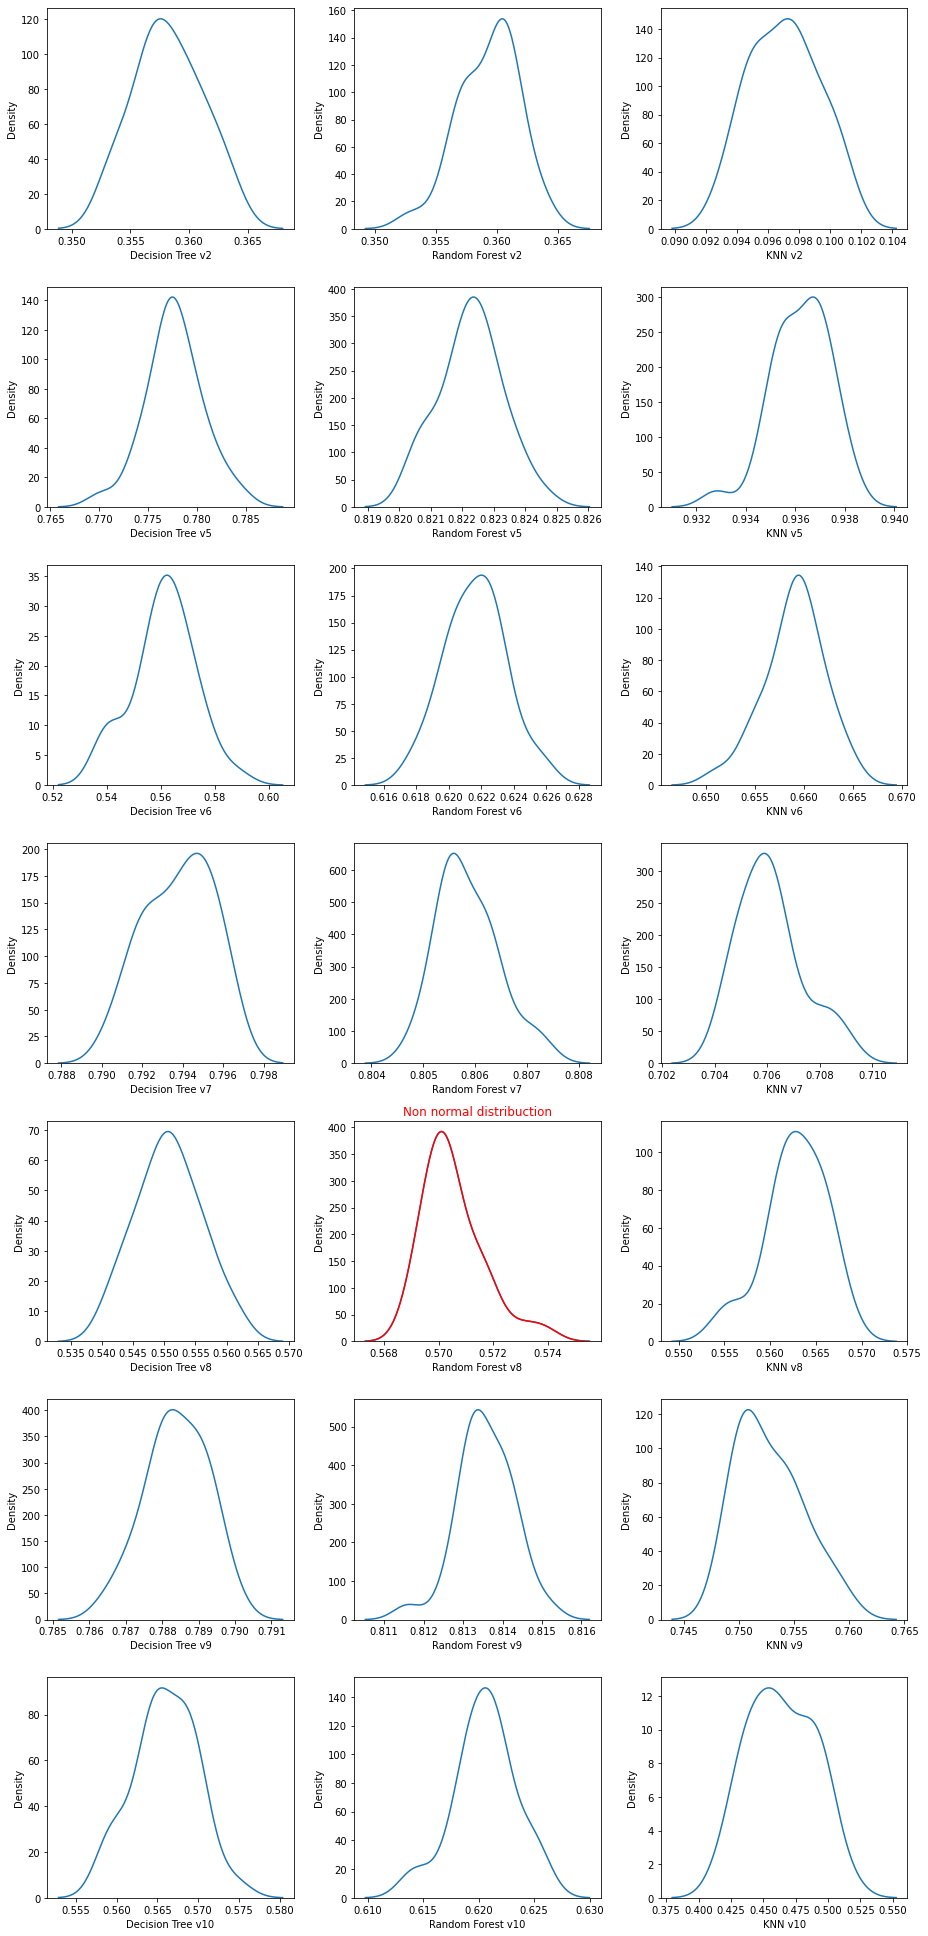

In [10]:
col = recall.columns

plt.figure(figsize=(13,27))
x = 1
for i in range(1,recall.shape[1]):
    plt.subplot(7,3,x)
    sns.kdeplot( x = recall[ col[i] ] )
    
    if(x == 14):
        sns.kdeplot( x = recall[ col[i] ], color = 'red' )
        plt.title("Non normal distribuction", fontsize = 12, color = 'red')
    plt.tight_layout()
    
    x +=1
plt.savefig("distribuicao.jpg", dpi = 300)
    

In [11]:
alpha = 0.05

_, p = f_oneway(recall[col[1]], recall[col[2]], recall[col[3]], recall[col[4]], recall[col[5]], recall[col[6]], recall[col[7]],
           recall[col[8]], recall[col[9]], recall[col[10]], recall[col[11]], recall[col[12]], recall[col[13]], recall[col[14]], 
         recall[col[15]], recall[col[16]], recall[col[17]], recall[col[18]], recall[col[19]], recall[col[20]], recall[col[21]])

print("The value of p is: {}".format(p))

if (p < alpha):
    print("Null hypothesis reject. The data are different. ")
else:
    print("Alternative hypothesis reject. The results are equal. ")


The value of p is: 0.0
Null hypothesis reject. The data are different. 


In [12]:
recall_melt = pd.melt(recall.drop(['ID'], axis = 1))
recall_melt.rename(columns={'variable': 'Algorithm', 'value': 'Score'}, inplace=True)
#recall_melt.head(60)

In [13]:
comparison_algorithms = MultiComparison(recall_melt['Score'], recall_melt['Algorithm'])

In [14]:
statistical_test = comparison_algorithms.tukeyhsd()
print(statistical_test)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
Decision Tree v10  Decision Tree v2  -0.2077  0.001 -0.2138 -0.2017   True
Decision Tree v10  Decision Tree v5   0.2117  0.001  0.2057  0.2178   True
Decision Tree v10  Decision Tree v6  -0.0048 0.3383 -0.0109  0.0012  False
Decision Tree v10  Decision Tree v7   0.2278  0.001  0.2218  0.2339   True
Decision Tree v10  Decision Tree v8  -0.0152  0.001 -0.0212 -0.0092   True
Decision Tree v10  Decision Tree v9   0.2224  0.001  0.2164  0.2285   True
Decision Tree v10           KNN v10   -0.102  0.001  -0.108 -0.0959   True
Decision Tree v10            KNN v2  -0.4689  0.001 -0.4749 -0.4629   True
Decision Tree v10            KNN v5   0.3703  0.001  0.3642  0.3763   True
Decision Tree v10            KNN v6    0.093  0.001   0.087  0.0991   True
Decision Tree v10        

In [15]:
recall.mean().sort_values()

KNN v2                0.097050
Decision Tree v2      0.358220
Random Forest v2      0.359337
KNN v10               0.463968
Decision Tree v8      0.550735
Decision Tree v6      0.561127
KNN v8                0.562789
Decision Tree v10     0.565944
Random Forest v8      0.570543
Random Forest v10     0.620558
Random Forest v6      0.621627
KNN v6                0.658990
KNN v7                0.706129
KNN v9                0.752800
Decision Tree v5      0.777691
Decision Tree v9      0.788392
Decision Tree v7      0.793790
Random Forest v7      0.805862
Random Forest v9      0.813568
Random Forest v5      0.822276
KNN v5                0.936221
ID                   14.500000
dtype: float64

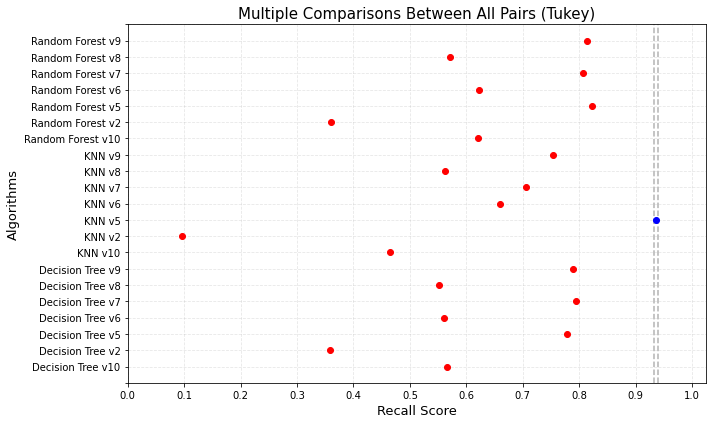

In [16]:
statistical_test.plot_simultaneous(comparison_name= 'KNN v5', figsize=(10,6))
plt.grid(linestyle = '--', alpha = 0.3)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Recall Score',fontsize = 13)
plt.ylabel('Algorithms',fontsize = 13)
plt.title('Multiple Comparisons Between All Pairs (Tukey)', fontsize=15)
plt.tight_layout()

plt.savefig('COMPARAÇÃO_algoritmos_Recall.jpg', dpi = 300)

plt.show()


# Loading Data: Accuracy Scores

In [17]:
accuracy = pd.read_csv("accuracy_completo.csv")
accuracy.head()

,Decision Tree v2,Random Forest v2,KNN v2,Decision Tree v5,Random Forest v5,KNN v5,Decision Tree v6,Random Forest v6,KNN v6,Decision Tree v7,Random Forest v7,KNN v7,Decision Tree v8,Random Forest v8,KNN v8,Decision Tree v9,Random Forest v9,KNN v9,Decision Tree v10,Random Forest v10,KNN v10
0,0.819156,0.817911,0.770622,0.844164,0.874000,0.827818,0.695743,0.709433,0.608116,0.860825,0.869256,0.761174,0.698241,0.703536,0.678058,0.867998,0.874343,0.850395,0.696840,0.702438,0.665265
1,0.818756,0.818400,0.770178,0.846451,0.874429,0.826417,0.696544,0.710831,0.607613,0.862140,0.869970,0.761831,0.697742,0.704937,0.678559,0.868627,0.874343,0.844108,0.694346,0.701440,0.670768
2,0.819156,0.817556,0.771067,0.843079,0.873771,0.826218,0.692447,0.710433,0.604216,0.861940,0.869770,0.762403,0.697643,0.702240,0.677858,0.869142,0.874171,0.851623,0.696843,0.702438,0.673258
3,0.819156,0.816756,0.771111,0.842021,0.875114,0.825103,0.699138,0.711529,0.608211,0.860511,0.869542,0.764146,0.695643,0.704735,0.680454,0.868942,0.874314,0.850366,0.695842,0.700638,0.664965
4,0.818356,0.818089,0.772222,0.846622,0.874257,0.827503,0.695945,0.708634,0.606114,0.863712,0.869456,0.763575,0.697644,0.703238,0.681657,0.869056,0.874857,0.846365,0.694645,0.699541,0.672266


In [18]:
accuracy.columns

Index(['Decision Tree v2', 'Random Forest v2', 'KNN v2', 'Decision Tree v5',
       'Random Forest v5', 'KNN v5', 'Decision Tree v6', 'Random Forest v6',
       'KNN v6', 'Decision Tree v7', 'Random Forest v7', 'KNN v7',
       'Decision Tree v8', 'Random Forest v8', 'KNN v8', 'Decision Tree v9',
       'Random Forest v9', 'KNN v9', 'Decision Tree v10', 'Random Forest v10',
       'KNN v10'],
      dtype='object')

In [19]:
accuracy.shape

(30, 21)

In [20]:
accuracy.describe()

,Decision Tree v2,Random Forest v2,KNN v2,Decision Tree v5,Random Forest v5,KNN v5,Decision Tree v6,Random Forest v6,KNN v6,Decision Tree v7,Random Forest v7,KNN v7,Decision Tree v8,Random Forest v8,KNN v8,Decision Tree v9,Random Forest v9,KNN v9,Decision Tree v10,Random Forest v10,KNN v10
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.818782,0.817401,0.770861,0.843486,0.874799,0.826992,0.695034,0.710658,0.606901,0.861962,0.869996,0.762253,0.697112,0.703893,0.679966,0.868613,0.874627,0.847658,0.695747,0.702232,0.671886
std,0.000399,0.000752,0.000765,0.001389,0.000605,0.000789,0.002393,0.001459,0.002227,0.000848,0.000470,0.001048,0.001569,0.000855,0.002065,0.000371,0.000506,0.002737,0.001472,0.001420,0.006370
min,0.817733,0.816267,0.769289,0.840420,0.873771,0.825103,0.689651,0.707233,0.601715,0.860425,0.869141,0.759802,0.693445,0.702238,0.675158,0.867770,0.873800,0.842764,0.693048,0.699541,0.658469
25%,0.818500,0.816767,0.770367,0.842657,0.874457,0.826310,0.693420,0.709604,0.605714,0.861390,0.869656,0.761510,0.696168,0.703463,0.678257,0.868348,0.874250,0.846022,0.694645,0.701465,0.667445
50%,0.818756,0.817511,0.770778,0.843336,0.874714,0.827246,0.695395,0.710732,0.607213,0.861940,0.869984,0.762317,0.697341,0.703936,0.679957,0.868613,0.874543,0.847508,0.695843,0.702139,0.672116
75%,0.819156,0.817944,0.771400,0.843957,0.875114,0.827546,0.696543,0.711480,0.608563,0.862569,0.870306,0.762710,0.698191,0.704486,0.681454,0.868927,0.874993,0.849137,0.696492,0.702740,0.677358
max,0.819422,0.818711,0.772311,0.846622,0.876114,0.828218,0.699138,0.713528,0.610014,0.863712,0.871171,0.764289,0.700140,0.705434,0.683255,0.869341,0.875800,0.853366,0.700141,0.706433,0.684151


## Measuring the coeficient of variation

In [21]:
coef_variacao_accuracy = 100 * accuracy.std()/accuracy.mean()
coef_variacao_accuracy.sort_values()

Decision Tree v9     0.042763
Decision Tree v2     0.048730
Random Forest v7     0.054058
Random Forest v9     0.057848
Random Forest v5     0.069118
Random Forest v2     0.091961
KNN v5               0.095389
Decision Tree v7     0.098398
KNN v2               0.099281
Random Forest v8     0.121433
KNN v7               0.137460
Decision Tree v5     0.164726
Random Forest v10    0.202269
Random Forest v6     0.205267
Decision Tree v10    0.211611
Decision Tree v8     0.225119
KNN v8               0.303681
KNN v9               0.322842
Decision Tree v6     0.344317
KNN v6               0.366909
KNN v10              0.948055
dtype: float64

In [22]:
accuracy.mean().sort_values()

KNN v6               0.606901
KNN v10              0.671886
KNN v8               0.679966
Decision Tree v6     0.695034
Decision Tree v10    0.695747
Decision Tree v8     0.697112
Random Forest v10    0.702232
Random Forest v8     0.703893
Random Forest v6     0.710658
KNN v7               0.762253
KNN v2               0.770861
Random Forest v2     0.817401
Decision Tree v2     0.818782
KNN v5               0.826992
Decision Tree v5     0.843486
KNN v9               0.847658
Decision Tree v7     0.861962
Decision Tree v9     0.868613
Random Forest v7     0.869996
Random Forest v9     0.874627
Random Forest v5     0.874799
dtype: float64

# Teste de normalidade dos resultados

In [23]:
alpha = 0.05

teste_normalidade = []
p_value = []

for i in range(0, accuracy.shape[1]):
    teste_normalidade.append(shapiro(accuracy[accuracy.columns[i]]).statistic)
    p_value.append(shapiro(accuracy[accuracy.columns[i]]).pvalue)

In [24]:
testes = pd.DataFrame(accuracy.columns, columns=['Algorithm'])
testes['Statistic'] = teste_normalidade
testes['pvalue'] = p_value
testes

,Algorithm,Statistic,pvalue
0,Decision Tree v2,0.958176,0.278028
1,Random Forest v2,0.943694,0.114398
2,KNN v2,0.981950,0.874683
3,Decision Tree v5,0.947889,0.148383
4,Random Forest v5,0.972189,0.600646
5,KNN v5,0.945742,0.129896
6,Decision Tree v6,0.966316,0.443892
7,Random Forest v6,0.985985,0.952742
8,KNN v6,0.945431,0.127419
9,Decision Tree v7,0.982817,0.894473


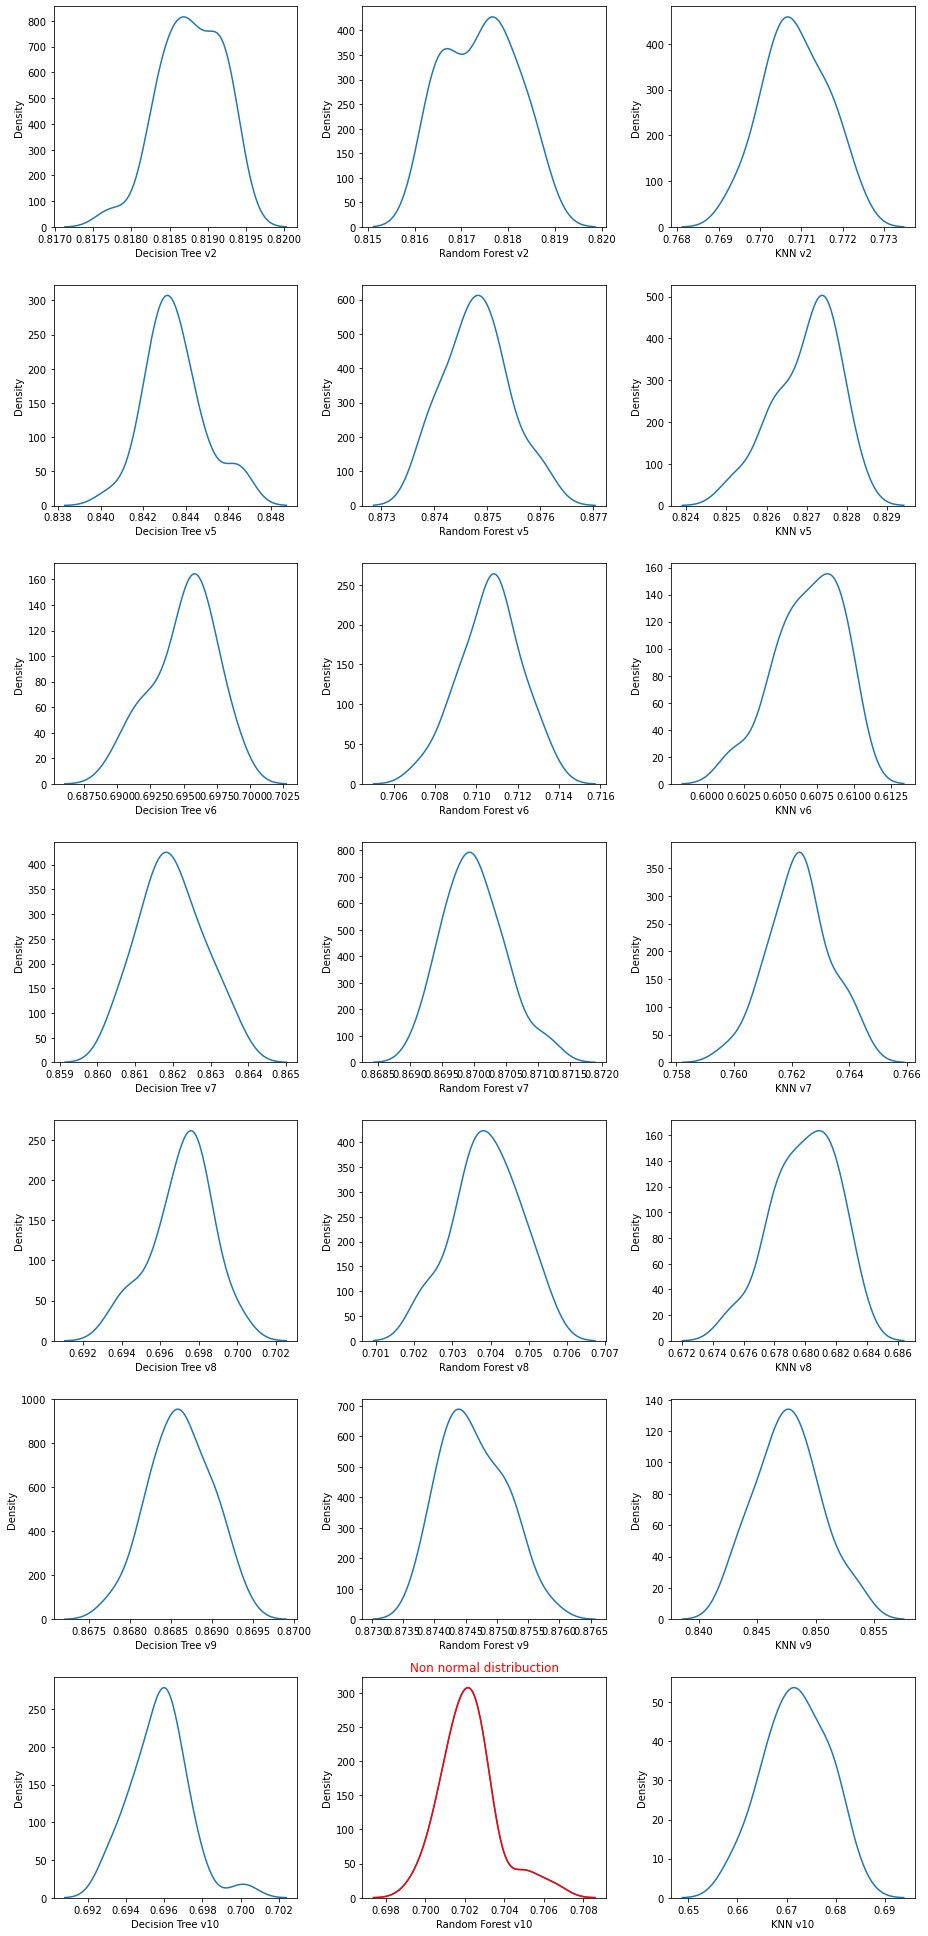

In [25]:
col = accuracy.columns

plt.figure(figsize=(13,27))
x = 1
for i in range(0, accuracy.shape[1]):
    plt.subplot(7,3,x)
    sns.kdeplot( x = accuracy[ col[i] ] )
    
    if(x == 20):
        sns.kdeplot( x = accuracy[ col[i] ], color = 'red' )
        plt.title("Non normal distribuction", fontsize = 12, color = 'red')
    plt.tight_layout()
    
    x +=1
plt.savefig("distribuicao_accuracy.jpg", dpi = 300)
    

In [26]:
alpha = 0.05

_, p = f_oneway(accuracy[col[1]], accuracy[col[2]], accuracy[col[3]], accuracy[col[4]], accuracy[col[5]], 
                accuracy[col[6]], accuracy[col[7]], accuracy[col[8]], accuracy[col[9]], accuracy[col[10]], 
                accuracy[col[11]], accuracy[col[12]], accuracy[col[13]], accuracy[col[14]], accuracy[col[15]],
                accuracy[col[16]], accuracy[col[17]], accuracy[col[18]], accuracy[col[19]],  
                accuracy[col[20]], accuracy[col[0]] )

print("O valor de p é: {}".format(p))

if (p < alpha):
    print("Hipótese nula rejeitada. Os dados são diferentes. ")
else:
    print("Hipótese alternativa rejeitada. Os resultados são diferentes. ")

O valor de p é: 0.0
Hipótese nula rejeitada. Os dados são diferentes. 


In [27]:
accuracy_melt = pd.melt(accuracy)
accuracy_melt.rename(columns={'variable': 'Algorithm', 'value': 'Score'}, inplace=True)

In [28]:
from statsmodels.stats.multicomp import MultiComparison

comparison_algorithms = MultiComparison(accuracy_melt['Score'], accuracy_melt['Algorithm'])

In [29]:
statistical_test = comparison_algorithms.tukeyhsd()
print(statistical_test)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
Decision Tree v10  Decision Tree v2    0.123  0.001  0.1212  0.1248   True
Decision Tree v10  Decision Tree v5   0.1477  0.001  0.1459  0.1495   True
Decision Tree v10  Decision Tree v6  -0.0007    0.9 -0.0025  0.0011  False
Decision Tree v10  Decision Tree v7   0.1662  0.001  0.1644   0.168   True
Decision Tree v10  Decision Tree v8   0.0014 0.4405 -0.0004  0.0032  False
Decision Tree v10  Decision Tree v9   0.1729  0.001  0.1711  0.1747   True
Decision Tree v10           KNN v10  -0.0239  0.001 -0.0257 -0.0221   True
Decision Tree v10            KNN v2   0.0751  0.001  0.0733  0.0769   True
Decision Tree v10            KNN v5   0.1312  0.001  0.1294   0.133   True
Decision Tree v10            KNN v6  -0.0888  0.001 -0.0906  -0.087   True
Decision Tree v10        

In [30]:
accuracy.mean().sort_values()

KNN v6               0.606901
KNN v10              0.671886
KNN v8               0.679966
Decision Tree v6     0.695034
Decision Tree v10    0.695747
Decision Tree v8     0.697112
Random Forest v10    0.702232
Random Forest v8     0.703893
Random Forest v6     0.710658
KNN v7               0.762253
KNN v2               0.770861
Random Forest v2     0.817401
Decision Tree v2     0.818782
KNN v5               0.826992
Decision Tree v5     0.843486
KNN v9               0.847658
Decision Tree v7     0.861962
Decision Tree v9     0.868613
Random Forest v7     0.869996
Random Forest v9     0.874627
Random Forest v5     0.874799
dtype: float64

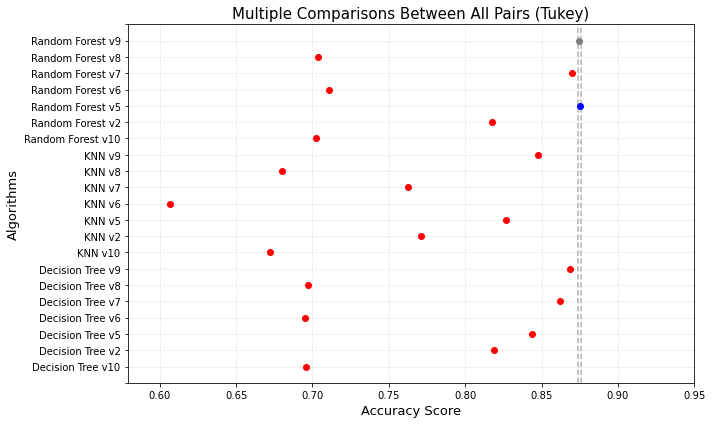

In [31]:
statistical_test.plot_simultaneous(comparison_name= 'Random Forest v5', figsize=(10,6))
plt.grid(linestyle = '--', alpha = 0.3)
plt.xticks(np.arange(0.6, 1., 0.05))
plt.xlabel('Accuracy Score',fontsize = 13)
plt.ylabel('Algorithms',fontsize = 13)
plt.title('Multiple Comparisons Between All Pairs (Tukey)', fontsize=15)
plt.tight_layout()

plt.savefig('COMPARAÇÃO_algoritmos_Accuracy.jpg', dpi = 300)

plt.show()
